In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import requests

# Value Investing

The ultimate goal is for our model to learn intrinsic value from independent variables and therefore predict if a stock ticker is under or over valued

### Exploratory Analysis

In [180]:
df = pd.read_csv("stockTickers.csv", header=None)
df_num = df.to_numpy()
for x in df_num:
    print(x[0])

AAPL
NVDA
MSFT
AMZN
GOOGL
GOOG
META
TSLA
AVGO
BRK.A
BRK.B
TSM
WMT
LLY
JPM
V
MA
UNH
ORCL
COST
XOM
NFLX
HD
PG
JNJ
BAC
NVO
ABBV
SAP
CRM
ASML
TMUS
KO
CVX
BABA
PLTR
WFC
CSCO
ACN
TM
IBM
AZN
PM
ABT
GE
MCD
MS
LIN
GS
AXP
MRK
NVS
ISRG
NOW
TMO
SHEL
ADBE
PEP
DIS
BX
HSBC
QCOM
T
AMD
ARM
VZ
CAT
UBER
PDD
RTX
RY
SPGI
BKNG
SHOP
TXN
INTU
APP
AMGN
BSX
C
PGR
BLK
UNP
HDB
AMAT
SCHW
SYK
MUFG
DHR
PFE
LOW
TJX
NEE
UL
BA
ANET
TTE
SNY
SONY
CMCSA
HON
PANW
SPOT
GILD
BHP
FI
SBUX
DE
ADP
KKR
COP
ETN
VRTX
MDT
PLD
BMY
MMC
CRWD
NKE
CB
RIO
LRCX
MU
UBS
BUD
TD
MELI
INTC
ADI
LMT
GEV
IBN
KLAC
ENB
UPS
CEG
WELL
ICE
RELX
SMFG
MCO
SO
BAM
WM
BP
MO
BN
ELV
SHW
SAN


In [181]:
fairValue = []
for x in df_num:
    try:
        data = yf.Ticker(x[0])
        eps = abs((data.financials.loc["Basic EPS"].iloc[0]/data.financials.loc["Basic EPS"].iloc[1])-1)*100
        if eps > 25:
            eps = 25
        elif eps < 5:
            eps = 5
        fairValue.append([x[0],eps*data.info['epsTrailingTwelveMonths']])
    except:
        fairValue.append([x[0],np.nan])

print(fairValue)

[['AAPL', 31.45], ['NVDA', 63.24999999999999], ['MSFT', 273.0041152263374], ['AMZN', nan], ['GOOGL', nan], ['GOOG', 201.25000000000003], ['META', 596.5], ['TSLA', nan], ['AVGO', 32.0], ['BRK.A', nan], ['BRK.B', nan], ['TSM', 172.75], ['WMT', 60.5], ['LLY', 292.75], ['JPM', 430.0283076923075], ['V', 173.33534378769622], ['MA', nan], ['UNH', 185.27374054371452], ['ORCL', 86.78095238095234], ['COST', 288.9280677009874], ['XOM', 92.5984251968505], ['NFLX', 495.5], ['HD', 139.2174432497012], ['PG', 31.400000000000002], ['JNJ', 144.75], ['BAC', 16.05], ['NVO', 68.13069094804499], ['ABBV', 26.837773992674002], ['SAP', 69.25], ['CRM', 151.75], ['ASML', 502.75], ['TMUS', nan], ['KO', 31.30909090909089], ['CVX', 243.00000000000003], ['BABA', 68.82658959537575], ['PLTR', nan], ['WFC', 134.25], ['CSCO', 39.233766233766254], ['ACN', 73.39266055045861], ['TM', 630.25], ['IBM', 160.5], ['AZN', nan], ['PM', 58.66334661354576], ['ABT', 131.9866129862656], ['GE', 152.0], ['MCD', 284.5], ['MS', 126.33226

In [182]:
fairValue = pd.DataFrame(fairValue)
print(fairValue)
fairValueTickerless = fairValue.drop(fairValue.columns[0],axis=1)
dfNew = pd.concat([df,fairValueTickerless],axis=1)
df_clean = dfNew.dropna()
print(df_clean)

         0           1
0     AAPL   31.450000
1     NVDA   63.250000
2     MSFT  273.004115
3     AMZN         NaN
4    GOOGL         NaN
..     ...         ...
145     MO  163.500000
146     BN    7.750000
147    ELV  128.500000
148    SHW  204.996169
149    SAN         NaN

[150 rows x 2 columns]
        0           1
0    AAPL   31.450000
1    NVDA   63.250000
2    MSFT  273.004115
5    GOOG  201.250000
6    META  596.500000
..    ...         ...
144    BP    3.500000
145    MO  163.500000
146    BN    7.750000
147   ELV  128.500000
148   SHW  204.996169

[125 rows x 2 columns]


In [183]:
df_clean2 = df_clean[df_clean.iloc[:,1] > 1]
df_clean2 = df_clean2[df_clean2.iloc[:,1] < 600]
df_clean2.columns = ['Ticker', 'FairValue']
df_clean2.head(100)

,Ticker,FairValue
0,AAPL,31.450000
1,NVDA,63.250000
2,MSFT,273.004115
5,GOOG,201.250000
6,META,596.500000
...,...,...
122,MU,87.250000
123,UBS,38.000000
124,BUD,34.478114
125,TD,48.173599


In [184]:
independentV = []
for index, row in df_clean2.iterrows():
    data2 = yf.Ticker(row['Ticker'])
    infos = data2.info
    try:
        PE = infos['trailingPE']
        if PE > 50:
            PE = np.nan
    except:
        PE = np.nan
    try:
        PB = infos['priceToBook']
        if PB > 50:
            PB = np.nan
    except:
        PB = np.nan

    independentV.append([PE,PB])

print(independentV)

[[39.082672, nan], [nan, nan], [33.558872, 10.221311], [23.185093, 7.010743], [29.121542, 9.640514], [nan, 3.8287094], [28.958033, 1.2098237], [40.16942, 8.863864], [nan, nan], [13.515704, 2.298692], [35.367306, 18.325315], [32.456074, 4.7395434], [43.137257, 35.801464], [nan, 18.788786], [14.285714, 1.8487949], [nan, 17.711817], [26.755255, nan], [26.625797, 7.782639], [27.578583, 5.3760686], [14.112149, 1.2656813], [26.333332, 2.5918477], [nan, nan], [nan, 7.381807], [nan, 5.2014894], [36.951267, 15.817493], [28.471544, 12.121841], [16.336418, 1.8268733], [27.977365, 0.33175552], [14.642458, 1.6111383], [28.364035, 5.6490216], [32.231155, 8.240156], [41.23676, 8.977585], [25.219635, -20.056902], [17.430628, 5.8041315], [34.332237, 11.587654], [26.63005, -57.439346], [16.898113, 2.3064244], [35.072132, 5.768126], [13.008903, 4.9886208], [18.28109, 4.8118916], [nan, 20.80067], [32.576015, 4.146244], [13.513834, 2.3451538], [36.84684, 14.216171], [35.89286, 1.9629952], [45.27624, 15.342

In [185]:
valueDf = pd.DataFrame(independentV)
valueDf.columns = ['P/E','P/B']
final_df = pd.concat([df_clean2,valueDf],axis=1)
final_df2 = final_df.dropna()
final_df2.head(100)

,Ticker,FairValue,P/E,P/B
2,MSFT,273.004115,33.558872,10.221311
6,META,596.500000,28.958033,1.209824
11,TSM,172.750000,32.456074,4.739543
12,WMT,60.500000,43.137257,35.801464
14,JPM,430.028308,14.285714,1.848795
...,...,...,...,...
109,KKR,82.000000,11.840909,0.004030
111,ETN,174.441687,20.470863,2.889766
113,MDT,16.400000,33.644638,11.525151
117,CRWD,12.500000,15.194552,2.184310


In [186]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = final_df2[['P/E','P/B']]
y = final_df2['FairValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = linear_model.Lasso(alpha=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)


[111.74502355 118.02672625 122.30346375 123.06086583 105.54522037
 104.59625334 115.24100634 111.43596008 128.56058649 114.81790632
 116.43471987 113.11556682 120.20565572 106.96501212 118.31637617]


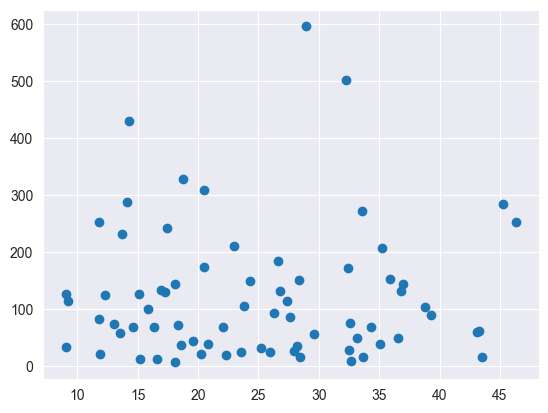

In [187]:
plt.scatter(final_df2['P/E'], final_df2['FairValue'])
plt.show()

In [191]:
pred2 = clf.predict([[14.33,1.29]])
print(pred2)

[112.45064496]


C:\Users\khodg\OneDrive\Documents\Github\pyTrader\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
